<a href="https://colab.research.google.com/github/pyc970905/pythonBigData/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B2%B0%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('/content/iris.csv')
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
Setosa_data = df[df['variety'] == 'Setosa']
Versicolor_data = df[df['variety'] == 'Versicolor']
Virginica_data = df[df['variety'] == 'Virginica']

In [8]:
Setosa_sepa_length_s = Setosa_data['sepal.length']
Setosa_sepa_length = Setosa_sepa_length_s.to_list()
Setosa_sepa_width_s = Setosa_data['sepal.width']
Setosa_sepa_width = Setosa_sepa_width_s.to_list()

Versicolor_sepa_length_s = Versicolor_data['sepal.length']
Versicolor_sepa_length = Versicolor_sepa_length_s.to_list()
Versicolor_sepa_width_s = Versicolor_data['sepal.width']
Versicolor_sepa_width = Versicolor_sepa_width_s.to_list()

Virginica_sepa_length_s = Virginica_data['sepal.length']
Virginica_sepa_length = Virginica_sepa_length_s.to_list()
Virginica_sepa_width_s = Virginica_data['sepal.width']
Virginica_sepa_width = Virginica_sepa_width_s.to_list()

In [9]:
sepa_length = Setosa_sepa_length + Versicolor_sepa_length + Virginica_sepa_length
sepa_width = Setosa_sepa_width + Versicolor_sepa_width + Virginica_sepa_width

In [11]:
i_data =  [[sl,sw] for sl, sw in zip(sepa_length, sepa_width)]
i_target = [0]*50 + [1]*50 + [2]*50

In [13]:
input_arr = np.array(i_data)
target_arr = np.array(i_target)
input_arr.shape

(150, 2)

In [66]:
index1 = np.arange(0,150)
np.random.shuffle(index1)

train_input = input_arr[index1[:125]]
train_target = target_arr[index1[:125]]
test_input = input_arr[index1[125:]]
test_target = target_arr[index1[125:]]

In [68]:
kn = KNeighborsClassifier()#모델 생성
kn.fit(train_input, train_target)#학습
print("score", kn.score(test_input,test_target))#평가

score 0.88


In [101]:
train_tar_li = train_target.tolist()
a = train_tar_li.count(0)
b = train_tar_li.count(1)
c = train_tar_li.count(2)

train_zip = [a,b,c]

print(train_tar_li.count(0))
print(train_tar_li.count(1))
print(train_tar_li.count(2))
print(train_zip)

38
41
46
[38, 41, 46]


In [102]:
test_tar_li = test_target.tolist()
aa = test_tar_li.count(0)
bb = test_tar_li.count(1)
cc = test_tar_li.count(2)

test_zip = [aa,bb,cc]

print(test_tar_li.count(0))
print(test_tar_li.count(1))
print(test_tar_li.count(2))
print(test_zip)

12
9
4
[12, 9, 4]


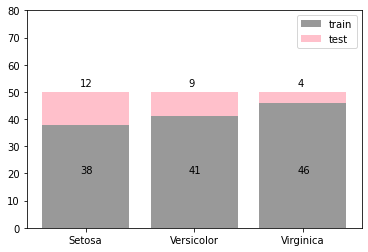

In [164]:
plt.bar(['Setosa','Versicolor','Virginica'],train_zip,color=('#999999'),label='train')
plt.bar(['Setosa','Versicolor','Virginica'],test_zip,color=('pink'),bottom = train_zip,label='test')
plt.ylim(0,80)
for i in range(3):
  plt.annotate(str(train_zip[i]),(i-0.05,20))
  plt.annotate(str(test_zip[i]),(i-0.05,52))
plt.legend()
plt.show()